# FEATURE DETECTION ALGORITHMS- OpenCV

Using OpenCV to find features and match images

### Index
- Harris Corner Detection
- Shi-Tomasi Corner Detection
- Scale-Invariant Feature Transform (SIFT)
- Speeded-Up Robust Features (SURF)
- Detection of blobs
- Histogram of Oriented Gradients (HoG)
- Binary Robust Independent Elementary Features (BRIEF)
- Oriented FAST and Rotated BRIEF (ORB)
- Feature Matching

## Imports

In [3]:
import cv2
import numpy as np 
import matplotlib
import skimage
from matplotlib import pyplot as plt 
from skimage.feature import hog

## 1. Harris Corner Detection

In [4]:
imput_img = 'z7.PNG'

# read the original image to analyze
ori = cv2.imread(imput_img)
print('ori shape =', ori.shape)

ori shape = (649, 656, 3)


In [5]:
# convert the RGB image (with 3 channels) to a gray image (with 1 channel)
gray = cv2.cvtColor(ori, cv2.COLOR_BGR2GRAY)
print('gray shape =', gray.shape)
print('gray dtype =', gray.dtype)

# change the type so that it will fit later models
gray = np.float32(gray)
print('gray new dtype =', gray.dtype)


gray shape = (649, 656)
gray dtype = uint8
gray new dtype = float32


In [6]:
# the function cornerHarris accepts:
# input "gray" has to be a float or 8 bit, 1 channel image
# blockSize "2" is the size of the neighborhood blocks
# ksize "3" is the aperture parameter for the Sobel operator
# k "0.04" is the Harris detector free parameter
""""
For every pixel p, a surrounding block of pixels of blockSize x blockSixe is considered.
Then a gradient covariation matrix M(x,y) is calculated over the block by using the Sobel derivatives.
Finally, the function dst(x,y) is maximized, where: dst(x,y) = det(M(x,y))-k*(trM(x,y))^2
"""
# the higher the blockSize, the stronger and bigger the red points because more vertices are found (2). Should be integer, in 1 there are no vertices
# ksize (3) should be integer, odd and up until 31. finds fewer vertices the higher the number. Only in 31 it doesnt find vertices
# the higher the free Harris detector (0.04) , the less vertices are found

dst = cv2.cornerHarris(gray,2,3,0.04)
print('dst.shape = ',dst.shape)

dst.shape =  (649, 656)


In [7]:
dst

array([[ 4.13125038e-01,  4.13125038e-01,  7.20273435e-01, ...,
         1.04567852e+04,  3.74374986e-01,  1.25000000e+00],
       [ 4.13125038e-01,  4.13125038e-01,  7.20273435e-01, ...,
         1.04567852e+04,  3.74374986e-01,  1.25000000e+00],
       [ 7.21718788e-01,  7.21718788e-01,  1.39105463e+00, ...,
         2.43778931e+02,  1.42806253e+01,  2.51078129e+00],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         1.76981914e+04,  4.11429395e+03,  4.55139209e+03],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         5.11992578e+03, -1.45385625e+04,  6.42955078e+02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         1.58891484e+04, -3.35838623e+03, -4.45498047e+01]], dtype=float32)

In [5]:
# keep stored the original image as "image"
# over which the red points will be displayed
image = cv2.imread(imput_img)

# the smaller the threshold, the more amount of red appears in the image, as expected
thr = 0.0001 # experimentally found its a good number
image[dst>=thr*dst.max()]=[0,0,255]

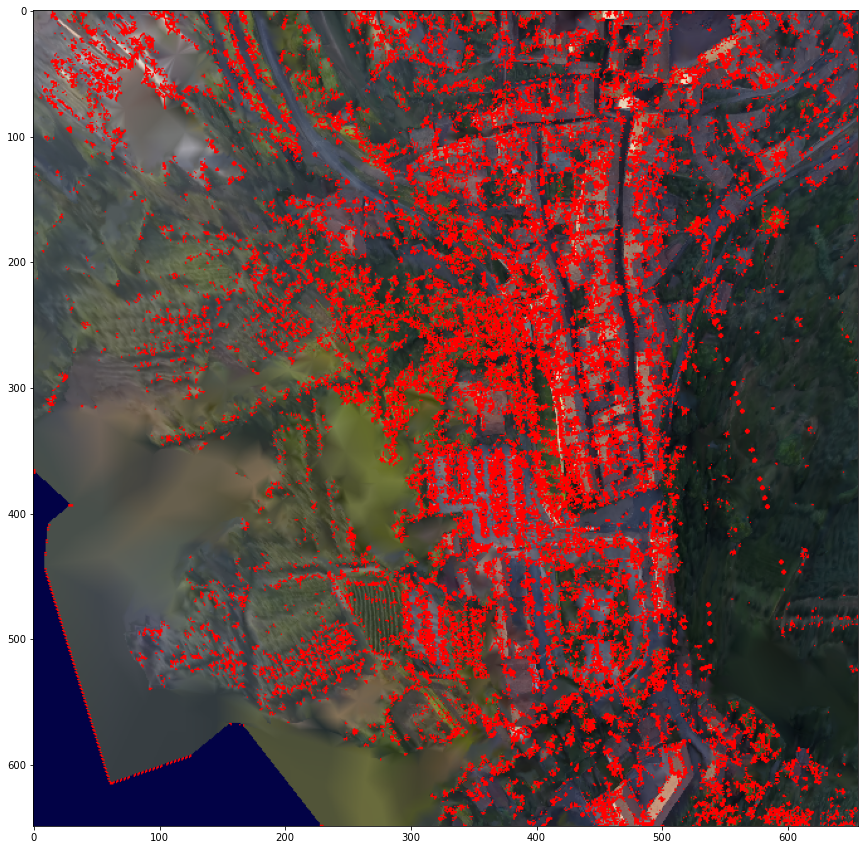

In [6]:
# plot the image with its vertices in red
# the image is converted from RGB-> BGR because plt needs BGR
fig, ax = plt.subplots(1,1,figsize=(15,15))
ax.imshow(image[...,::-1])
plt.show()

---

## 2. Shi-Tomasi Corner Detection
Basically finds less vertices than the Harris Corner algorithm.

**cv2.goodFeaturesToTrack(gray,20,0.01,10)**

---

## 3. Scale-Invariant Feature Transform (SIFT)
It can detect features from the image irrespective of its **size** and orientation (rotation is also detected in Harris).

In [8]:
# load original image to analyze and image to modify and show
ori = cv2.imread('z10.png')
img = cv2.imread('z10.png')

# create one-channel image out of the 3-channel RGB image "img"
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
print('gray.shape = ',gray.shape)

gray.shape =  (218, 341)


In [9]:
# create the sift object that can be applied to different 1-channel images
sift = cv2.SIFT_create()

In [10]:
# the detection part calculates the keypoints, they have:
# - x,y property
# - the "size" is the diameter of the meaningful keypoint neighborhood
# - angle of orientation
# which represents the meaningfulness of the neighbour
# the computation part calculates the descriptors from the keypoints
# aparently you cannot define any parameters
kp, des = sift.detectAndCompute(gray,None)
print('number of keypoints found = ',len(kp))
print(kp[0])

number of keypoints found =  316
<KeyPoint 00000207A03810F0>


A **SIFT descriptor** is a 3-D spatial histogram of the image gradients in characterizing the appearance of a keypoint. The gradient at each pixel is regarded as a sample of a three-dimensional elementary feature vector, formed by the pixel location and the gradient orientation. Samples are weighed by the gradient norm and accumulated in a 3-D histogram h, which (up to normalization and clamping) forms the SIFT descriptor of the region. An additional Gaussian weighting function is applied to give less importance to gradients farther away from the keypoint center. Orientations are quantized into eight bins and the spatial coordinates into four each, as follows:


https://www.vlfeat.org/api/sift.html 

In [11]:
# draw the small circles on the locations of the keypoints
# if you add the DRAW_MATCHES...RICH_KEYPOINTS then it will plot the circle around the keypoint with its size and orientation
shut_output = cv2.drawKeypoints(gray,kp,img,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

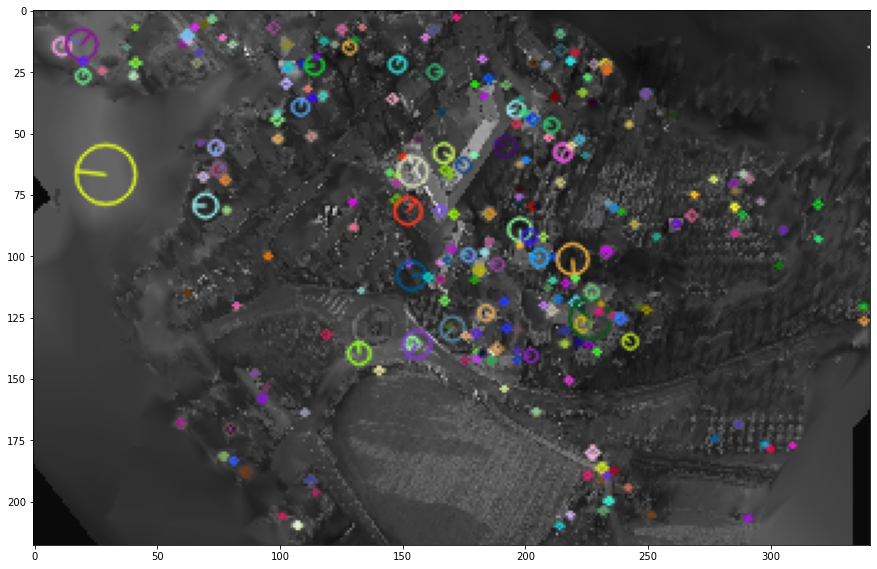

In [12]:
# plot the image with its vertices in red
# the image is converted from RGB-> BGR because plt needs BGR
fig, ax = plt.subplots(1,1,figsize=(15,15))
ax.imshow(img[...,::-1])
plt.show()

*Very few SIFTs are found on the z10.png image!!*

https://docs.opencv.org/3.4/da/df5/tutorial_py_sift_intro.html

---

## 4. Speeded-Up Robust Features (SURF)
SURF algorithm is simply an upgraded version of SIFT.

# load images
ori =cv2.imread('capp.png')
img = cv2.imread('capp.png')

# create the surf object
# NOT WORKING
# surf = cv2.xfeatures2d.SURF_create(400) #patent issues

# calculate keypoints
kp, des = surf.detectAndCompute(img,None)

# add keypoints in red to the image 'img'
img2 = cv.drawKeypoints(img,kp,None,(255,0,0),4)

# plot the image with its vertices in red
# the image is converted from RGB-> BGR because plt needs BGR
fig, ax = plt.subplots(1,1,figsize=(15,15))
ax.imshow(img2[...,::-1])
plt.show()

---

## 5. Detection of blobs
BLOB stands for Binary Large Object. It refers to a group of connected pixels or regions in a particular binary image that shares a common property. These regions are contours in OpenCV with some extra features like centroid, color, area, a mean, and standard deviation of the pixel values in the covered region

In [12]:
ori = cv2.imread('capp.png')

# already the image "im" is loaded with 1-channel representation
im = cv2.imread("capp.png", cv2.IMREAD_GRAYSCALE)
print('ori shape = ',ori.shape)
print('im shape = ',im.shape)

ori shape =  (1080, 1920, 3)
im shape =  (1080, 1920)


In [13]:
# create the object blob detector
detector = cv2.SimpleBlobDetector_create()
detector

<SimpleBlobDetector 00000176DB37DD50>

In [14]:
# calculate the keypoints
keypoints = detector.detect(im)
print('number of keypoints found = ',len(keypoints))
print(keypoints[0])

number of keypoints found =  209
<KeyPoint 00000176DB1AAA50>


In [15]:
# add the keypoints to an image "im"
# you define the keypoints to be red B,G,R remember!
# DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS parameter serves for
im_with_keypoints = cv2.drawKeypoints(im, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

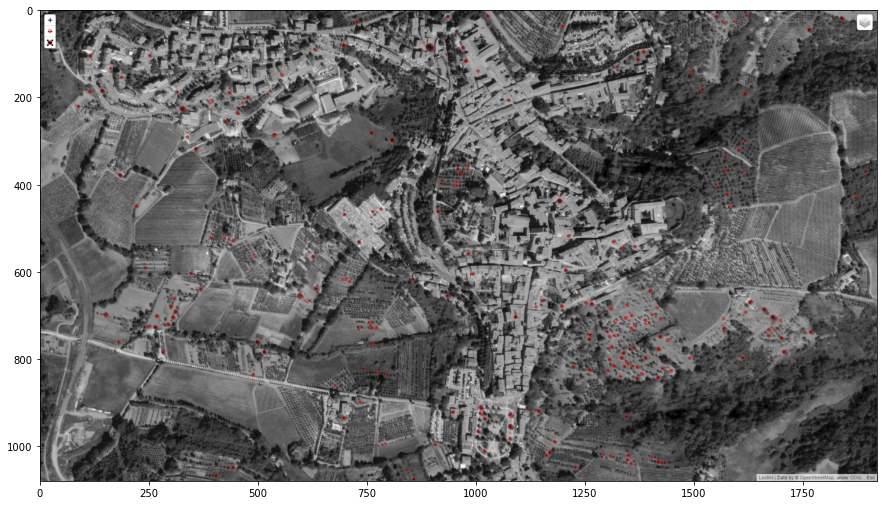

In [16]:
# plot the image with its vertices in red
# the image is converted from RGB-> BGR because plt needs BGR
fig, ax = plt.subplots(1,1,figsize=(15,15))
ax.imshow(im_with_keypoints[...,::-1])
plt.show()

## 6. Histogram of Oriented Gradients (HoG)
HoG is a technique that is used to count the occurrence of gradient orientation in localized portions of an image.

In [13]:
ori = cv2.imread('z8.png')
img = cv2.imread('z8.png') 

In [17]:
# 
_, hog_image = hog(img, orientations=12, pixels_per_cell=(4, 4), cells_per_block=(4, 4), visualize=True, multichannel=True)

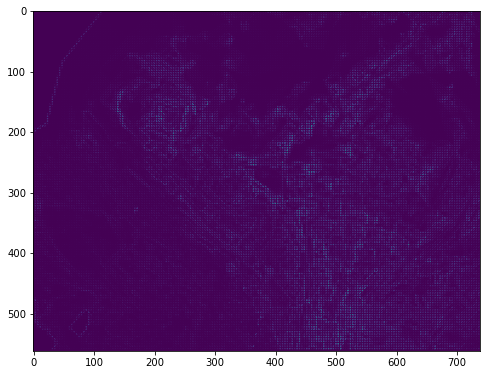

In [18]:
# plot the image with its vertices in red
# the image is converted from RGB-> BGR because plt needs BGR
fig, ax = plt.subplots(1,1,figsize=(8,15))
ax.imshow(hog_image[...,::-1])
plt.show()

## 7. Binary Robust Independent Elementary Features (BRIEF)
BRIEF is an alternative to the popular SIFT descriptor and they are faster to compute and more compact.

In [ ]:
ori = cv2.imread('capp.png')
img = cv2.imread('capp.png',0)
#star = cv2.xfeatures2d.StarDetector_create()
brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()
#kp = star.detect(img,None)
kp, des = brief.compute(img, kp)
img2 = cv2.drawKeypoints(img, kp, None, color=(0, 255, 0), flags=0)

## 8. Oriented FAST and Rotated BRIEF (ORB)
ORB is a one-shot facial recognition algorithm. Here, two algorithms are involved. FAST and BRIEF.

In [27]:
# load images
ori = cv2.imread('capp.png') 
img = cv2.imread('capp.png', 0)

In [28]:
# create the ORB object with nfeatures as a parameter
orb = cv2.ORB_create(nfeatures=500)

In [29]:
# detect keypoints and compute descriptors
kp, des = orb.detectAndCompute(img, None)
print('there are nfeatures = ',len(des))

there are nfeatures =  500


In [30]:
# draw the keypoints in red
img2 = cv2.drawKeypoints(img, kp, None, color=(0, 0, 255), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

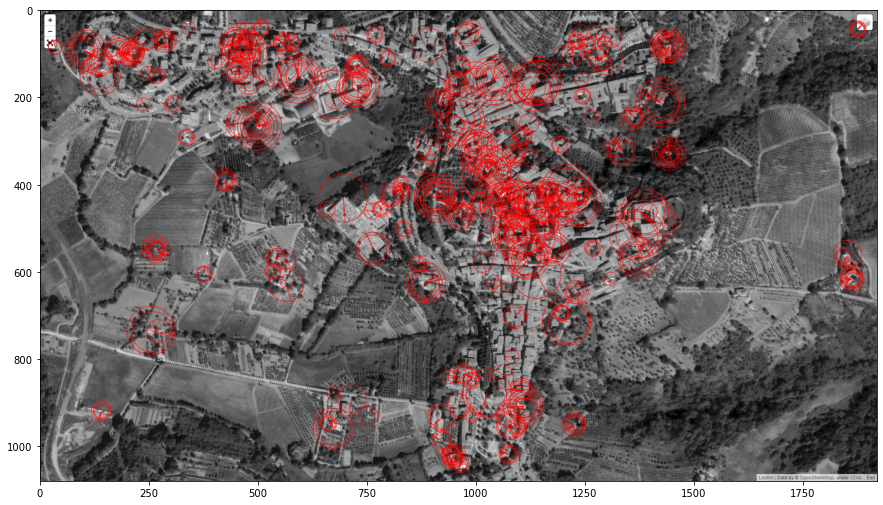

In [31]:
# plot the image with its vertices in red
# the image is converted from RGB-> BGR because plt needs BGR
fig, ax = plt.subplots(1,1,figsize=(15,15))
ax.imshow(img2[...,::-1])
plt.show()

## 9. Feature Matching
Feature matching is like comparing the features of two images which may be different in orientations, perspective, lightening, or even differ in sizes and colors. Let’s see its implementation.

- Could use SIFT
- Could use ORB

des1b type =  uint8
des2b type =  uint8
number of matches =  155 , notice it might not be the same as nfeatures defined!
N_imp = 100


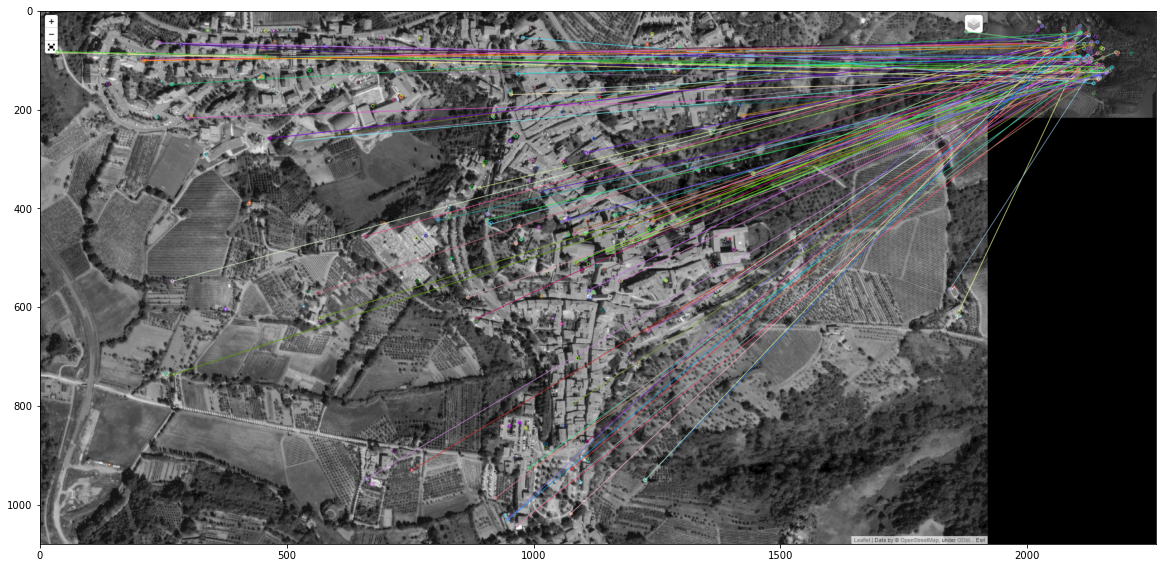

In [25]:
# import stuff
import cv2
import numpy as np 
import matplotlib
from matplotlib import pyplot as plt 

# load images
img1 = cv2.imread('capp.png', 0)
img2 = cv2.imread('z10.png', 0)

# create object
sift = cv2.ORB_create(nfeatures=500)

# compute keypoints and descriptors in both images
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

# cast data to an appropriate type (unsigned integer 8 bits)
des1b = np.uint8(des1)
print('des1b type = ',des1b.dtype)
des2b = np.uint8(des2)
print('des2b type = ',des2b.dtype)

# create the matcher object with parameter:
# - NORM_L2
# - NORM_HAMMING: looks like there are more matches
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# compute the matches (slow if lots of matches)
matches = bf.match(des1b, des2b)
print('number of matches = ',len(matches),', notice it might not be the same as nfeatures defined!')

# it only draws the first N_imp most important matches
N_imp = input('N_imp = ')
matches = sorted(matches, key=lambda x: x.distance)
match_img = cv2.drawMatches(img1, kp1, img2, kp2, matches[:int(N_imp)], cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# plot the image with its vertices in red
# the image is converted from RGB-> BGR because plt needs BGR
fig, ax = plt.subplots(1,1,figsize=(20,20))
ax.imshow(match_img[...,::-1])
plt.show()

## References:
- https://docs.opencv.org/4.x/dd/d1a/group__imgproc__feature.html#gac1fc3598018010880e370e2f709b4345